In [35]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [20]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [21]:
# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [22]:
model = Sequential([

    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), # 32 filters, 3x3 size
    MaxPooling2D(2,2), # 2x2 selection

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(), # make 2D array to 1D
    Dense(units=128, activation='relu'), # layer of neurons
    Dense(units=10, activation='softmax')

])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [24]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4667 - accuracy: 0.8317
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3216 - accuracy: 0.8834
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2794 - accuracy: 0.8969
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2475 - accuracy: 0.9084
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2229 - accuracy: 0.9166


In [26]:
# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.2713 - accuracy: 0.8993


In [27]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


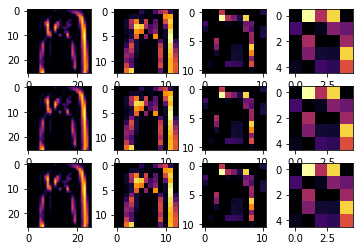

In [36]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=1
SECOND_IMAGE=1
THIRD_IMAGE=1
CONVOLUTION_NUMBER = 20

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)
